In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import time

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [6]:
df = pd.read_csv('../data/customer_cleaned.csv')
df.shape

(70698, 11)

In [7]:
df.head(10)

,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,gas_usage,rooms
0,1,1.0,-0.351836,2,1,0,0.0,0.200000,0,0.367311,3
1,0,0.0,-0.331378,0,1,3,0.0,0.683333,0,0.003515,6
2,0,1.0,-0.368885,2,1,1,2.0,0.258333,0,0.068541,3
3,0,0.0,-0.082981,3,1,0,1.0,0.775000,0,0.209139,2
4,1,1.0,-0.062011,0,1,3,2.0,0.558333,0,0.003515,2
5,1,0.0,-0.537666,1,1,0,2.0,0.633333,0,0.349736,6
6,0,1.0,-0.287052,1,0,3,2.0,0.216667,0,0.003515,3
7,0,0.0,-0.137025,1,1,0,2.0,0.608333,0,0.086116,5
8,0,1.0,-0.300691,2,1,0,5.0,0.225000,0,0.003515,4
9,1,1.0,-0.194990,1,1,1,3.0,0.450000,0,0.033392,6


In [8]:
X = df.drop(['health_ins'], axis=1)
y = df['health_ins']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [10]:
def plot_measures(measures):
    parameters = measures.iloc[:,0]
    accuracy = measures.iloc[:,1]
    precision = measures.iloc[:,2]
    recall = measures.iloc[:,3]
    f1 = measures.iloc[:,4]

    sns.lineplot(x=parameters, y=accuracy, label='accuracy')
    sns.lineplot(x=parameters, y=precision, label='precision')
    sns.lineplot(x=parameters, y=recall, label='recall')
    sns.lineplot(x=parameters, y=f1, label='f1')


In [11]:
def get_metrics(y_pred):
    acc = round(accuracy_score(y_test, y_pred),3)
    prec = round(precision_score(y_test, y_pred),3)
    rec = round(recall_score(y_test, y_pred),3)
    f1 = round(f1_score(y_test, y_pred),3)
    return acc, prec, rec, f1

In [12]:
models = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1', 'time_s'])

## Decision Trees

Fitting model with 1
Fitting model with 3
Fitting model with 5
Fitting model with 7
Fitting model with 9
Fitting model with 11
Fitting model with 13
Fitting model with 15
Fitting model with 17
Fitting model with 19
Fitting model with None
    max_depth  accuracy  precision  recall     f1  time_s
0         1.0     0.909      0.909   1.000  0.952   0.066
1         3.0     0.909      0.909   1.000  0.952   0.055
2         5.0     0.909      0.909   1.000  0.952   0.081
3         7.0     0.907      0.909   0.997  0.951   0.106
4         9.0     0.903      0.910   0.992  0.949   0.130
5        11.0     0.896      0.914   0.978  0.945   0.152
6        13.0     0.884      0.916   0.961  0.938   0.173
7        15.0     0.873      0.918   0.945  0.931   0.185
8        17.0     0.862      0.919   0.930  0.925   0.204
9        19.0     0.853      0.921   0.917  0.919   0.210
10        NaN     0.844      0.922   0.905  0.914   0.232


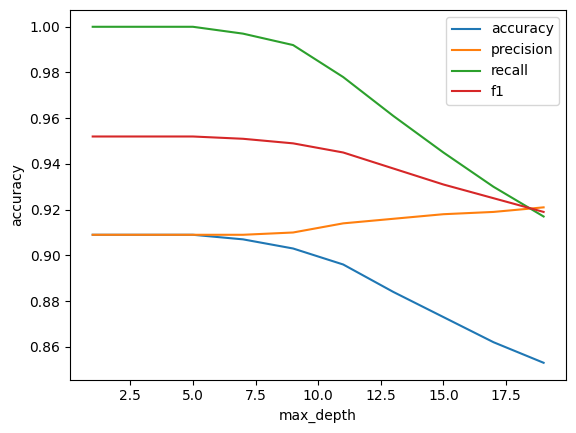

In [13]:
dec_tree_measures = pd.DataFrame(columns=['max_depth', 'accuracy', 'precision', 'recall', 'f1', 'time_s'])
parameters = list(range(1, 20, 2)) + [None]

for max_depth in parameters:
    print(f'Fitting model with {max_depth}')
    model = DecisionTreeClassifier(max_depth=max_depth)
    
    start_t = time.time()
    model.fit(X_train, y_train)
    time_spent = time.time() - start_t

    y_pred = model.predict(X_test)
    measures = get_metrics(y_pred)
    dec_tree_measures.loc[len(dec_tree_measures)] = [max_depth, measures[0], measures[1], measures[2], measures[3], round(time_spent,3)]

print(dec_tree_measures)
plot_measures(dec_tree_measures)

In [14]:
row = dec_tree_measures[dec_tree_measures['max_depth'] == 7]
models.loc[len(models)] = ['DecisionTree', row['accuracy'].values[0], row['precision'].values[0], row['recall'].values[0], row['f1'].values[0], row['time_s'].values[0]]
models

,model,accuracy,precision,recall,f1,time_s
0,DecisionTree,0.907,0.909,0.997,0.951,0.106


## Random Forest

Fitting model with 10
Fitting model with 20
Fitting model with 50
Fitting model with 75
Fitting model with 100
Fitting model with 200
Fitting model with 500
   n_trees  accuracy  precision  recall     f1  time_s
0     10.0     0.894      0.917   0.971  0.943   0.579
1     20.0     0.902      0.914   0.984  0.948   1.142
2     50.0     0.905      0.913   0.990  0.950   2.879
3     75.0     0.906      0.913   0.992  0.951   4.311
4    100.0     0.906      0.913   0.991  0.950   5.741
5    200.0     0.907      0.912   0.993  0.951  11.242
6    500.0     0.907      0.912   0.993  0.951  28.135


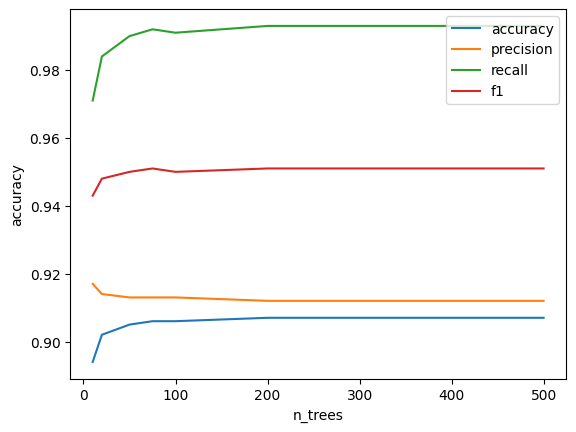

In [15]:
rf_measures = pd.DataFrame(columns=['n_trees', 'accuracy', 'precision', 'recall', 'f1', 'time_s'])
parameters = [10, 20, 50, 75, 100, 200, 500]

for n_estimators in parameters:
    print(f'Fitting model with {n_estimators}')
    model = RandomForestClassifier(n_estimators=n_estimators)

    start_t = time.time()
    model.fit(X_train, y_train)
    time_spent = time.time() - start_t

    y_pred = model.predict(X_test)
    measures = get_metrics(y_pred)
    rf_measures.loc[len(rf_measures)] = [n_estimators, measures[0], measures[1], measures[2], measures[3], round(time_spent,3)]

print(rf_measures)
plot_measures(rf_measures)

Fitting model with 10
Fitting model with 20
Fitting model with 50
Fitting model with 75
Fitting model with 100
Fitting model with 200
Fitting model with 500
   n_trees  accuracy  precision  recall     f1  time_s
0     10.0     0.908      0.909   0.999  0.952   0.408
1     20.0     0.909      0.909   1.000  0.952   0.776
2     50.0     0.909      0.909   1.000  0.952   1.976
3     75.0     0.909      0.909   1.000  0.952   3.071
4    100.0     0.909      0.909   1.000  0.952   3.925
5    200.0     0.909      0.909   1.000  0.952   8.012
6    500.0     0.909      0.909   1.000  0.952  20.406


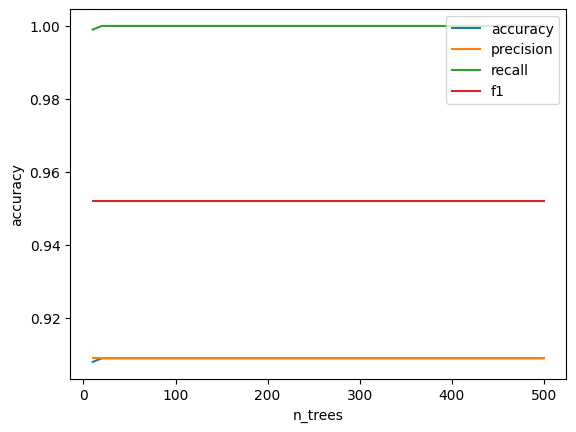

In [16]:
rf_measures2 = pd.DataFrame(columns=['n_trees', 'accuracy', 'precision', 'recall', 'f1', 'time_s'])
parameters = [10, 20, 50, 75, 100, 200, 500]

for n_estimators in parameters:
    print(f'Fitting model with {n_estimators}')
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=10)

    start_t = time.time()
    model.fit(X_train, y_train)
    time_spent = time.time() - start_t

    y_pred = model.predict(X_test)
    measures = get_metrics(y_pred)
    rf_measures2.loc[len(rf_measures2)] = [n_estimators, measures[0], measures[1], measures[2], measures[3], round(time_spent,3)]

print(rf_measures2)
plot_measures(rf_measures2)

In [17]:
row = rf_measures2[rf_measures2['n_trees'] == 50]
models.loc[len(models)] = ['RandomForest', row['accuracy'].values[0], row['precision'].values[0], row['recall'].values[0], row['f1'].values[0], row['time_s'].values[0]]
models

,model,accuracy,precision,recall,f1,time_s
0,DecisionTree,0.907,0.909,0.997,0.951,0.106
1,RandomForest,0.909,0.909,1.000,0.952,1.976


## K Nearest Neighbors

Fitting model with 3
Fitting model with 5
Fitting model with 7
Fitting model with 9
Fitting model with 11
Fitting model with 13
Fitting model with 15
Fitting model with 17
Fitting model with 19
Fitting model with 21
Fitting model with 23
Fitting model with 25
Fitting model with 27
Fitting model with 29
    n_neigh  accuracy  precision  recall     f1  time_s
0       3.0     0.890      0.916   0.968  0.941   1.927
1       5.0     0.900      0.914   0.983  0.947   2.127
2       7.0     0.904      0.912   0.990  0.950   2.210
3       9.0     0.906      0.911   0.994  0.951   2.371
4      11.0     0.908      0.911   0.996  0.952   2.381
5      13.0     0.908      0.910   0.997  0.952   2.459
6      15.0     0.908      0.910   0.997  0.952   2.516
7      17.0     0.909      0.910   0.998  0.952   2.585
8      19.0     0.909      0.910   0.998  0.952   2.632
9      21.0     0.909      0.910   0.998  0.952   2.739
10     23.0     0.909      0.910   0.999  0.952   2.808
11     25.0     0.909   

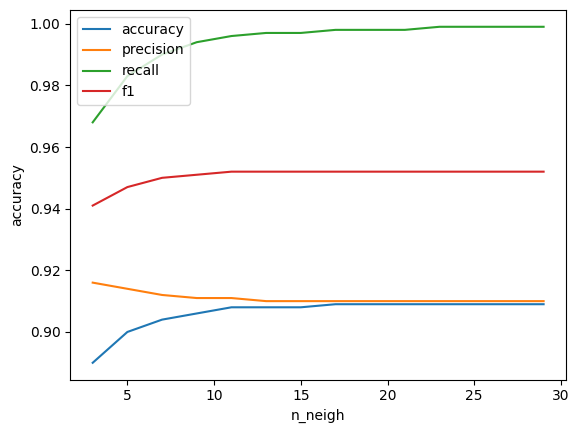

In [18]:
knn_measures = pd.DataFrame(columns=['n_neigh', 'accuracy', 'precision', 'recall', 'f1', 'time_s'])
parameters = list(range(3, 31, 2))

for k in parameters:
    print(f'Fitting model with {k}')
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    start_t = time.time()
    y_pred = model.predict(X_test)
    time_spent = time.time() - start_t
    measures = get_metrics(y_pred)
    knn_measures.loc[len(knn_measures)] = [k, measures[0], measures[1], measures[2], measures[3], round(time_spent,3)]

print(knn_measures)
plot_measures(knn_measures)

In [19]:
row = knn_measures[knn_measures['n_neigh'] == 11]
models.loc[len(models)] = ['KNeighbors', row['accuracy'].values[0], row['precision'].values[0], row['recall'].values[0], row['f1'].values[0], row['time_s'].values[0]]
models

,model,accuracy,precision,recall,f1,time_s
0,DecisionTree,0.907,0.909,0.997,0.951,0.106
1,RandomForest,0.909,0.909,1.000,0.952,1.976
2,KNeighbors,0.908,0.911,0.996,0.952,2.381


## Support Vector Machines

In [20]:
X_resampled, _, y_resampled, _ = train_test_split(X, y, test_size=0.8, stratify=y, random_state=42)
X_resampled.shape, len(y_resampled)

((14139, 10), 14139)

In [21]:
X_trainr, X_testr, y_trainr, y_testr = train_test_split(X_resampled, y_resampled, test_size=0.2, shuffle=True)

In [ ]:
parameters = {
    'C': [0.1, 0.5, 1, 10],
    'kernel': ['linear','rbf','sigmoid'],
    'probability': [True, False]
}

grid_search = GridSearchCV(estimator=SVC(), param_grid=parameters, cv=5, scoring='f1')
grid_search.fit(X_trainr, y_trainr)
best_params = grid_search.best_params_
best_params

In [ ]:
model = SVC(C=best_params['C'], kernel=best_params['kernel'], probability=best_params['probability'])

start_t = time.time()
model.fit(X_train, y_train)
time_spent = time.time() - start_t

y_pred = model.predict(X_test)
measures = get_metrics(y_pred)
models.loc[len(models)] = ['SVM', measures[0], measures[1], measures[2], measures[3], round(time_spent,3)]
models

,model,accuracy,precision,recall,f1,time_s
0,DecisionTree,0.907,0.908,0.998,0.951,0.107
1,RandomForest,0.908,0.908,1.000,0.952,1.970
2,KNeighbors,0.906,0.908,0.997,0.951,3.092
3,SVM,0.908,0.908,1.000,0.952,66.395


## Logistic Regression

In [ ]:
parameters = {
    'C': [0.1, 0.5, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'class_weight': ['balanced', None],
    'max_iter': [100, 200, 500]
}

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters, cv=5, scoring='f1')
grid_search.fit(X_trainr, y_trainr)
best_params = grid_search.best_params_
best_params

/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'C': 10,
 'class_weight': None,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [ ]:
model = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver=best_params['solver'], class_weight=best_params['class_weight'], max_iter=best_params['max_iter'])

start_t = time.time()
model.fit(X_train, y_train)
time_spent = time.time() - start_t

y_pred = model.predict(X_test)
measures = get_metrics(y_pred)
models.loc[len(models)] = ['LogisticRegression', measures[0], measures[1], measures[2], measures[3], round(time_spent,3)]

models

,model,accuracy,precision,recall,f1,time_s
0,DecisionTree,0.907,0.908,0.998,0.951,0.107
1,RandomForest,0.908,0.908,1.000,0.952,1.970
2,KNeighbors,0.906,0.908,0.997,0.951,3.092
3,SVM,0.908,0.908,1.000,0.952,66.395
4,LogisticRegression,0.908,0.908,0.999,0.952,0.380


## Overall comparison of the models

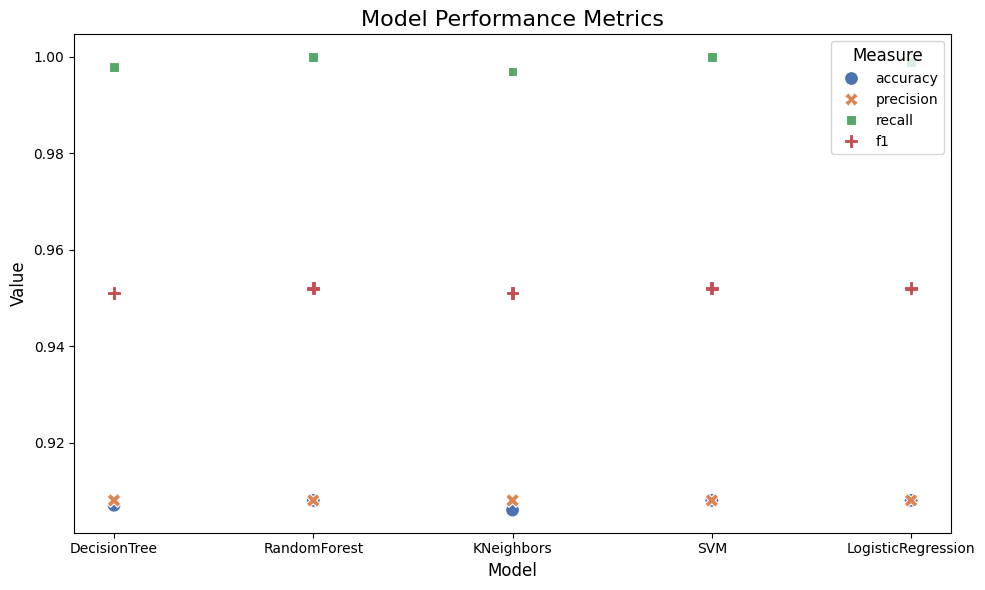

In [ ]:
melted = models.melt(id_vars="model", value_vars=["accuracy", "precision", "recall", "f1"],
                     var_name="measure", value_name="value")

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=melted, x="model", y="value", hue="measure", style="measure", s=100, palette="deep")

# Customize the plot
plt.title("Model Performance Metrics", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Measure", fontsize=10, title_fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()